<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/Exercise87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
from google.colab import files
uploaded=files.upload()

In [155]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [156]:
df=pd.read_csv("Loan_Dataset.csv")
df.head()

,Loan.ID,Credit.Score,Annual.Income,Loan.Status
0,0,739.0,95357.0,1
1,1,619.0,54406.0,1
2,3,738.0,40480.0,1
3,4,738.0,53965.0,1
4,5,731.0,47709.0,1


In [157]:
data=df[['Credit.Score','Annual.Income','Loan.Status']]
data.head()

,Credit.Score,Annual.Income,Loan.Status
0,739.0,95357.0,1
1,619.0,54406.0,1
2,738.0,40480.0,1
3,738.0,53965.0,1
4,731.0,47709.0,1


In [158]:
data.dtypes

Credit.Score     float64
Annual.Income    float64
Loan.Status        int64
dtype: object

In [159]:
# Convert 'Credit.Score' column to integer data type
data['Credit.Score'] = data['Credit.Score'].astype('Int64').fillna(pd.NA)
data['Annual.Income'] = data['Annual.Income'].astype('Int64').fillna(pd.NA)
data.dtypes

<ipython-input-159-9453cce86fff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Credit.Score'] = data['Credit.Score'].astype('Int64').fillna(pd.NA)
<ipython-input-159-9453cce86fff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Annual.Income'] = data['Annual.Income'].astype('Int64').fillna(pd.NA)


Credit.Score     Int64
Annual.Income    Int64
Loan.Status      int64
dtype: object

In [160]:
data.isnull().sum()

Credit.Score     12229
Annual.Income    12229
Loan.Status          0
dtype: int64

In [161]:
count_300=0
count_900=0
for point in data['Credit.Score']:
  if pd.notna(point):
    if point<300:
      count_300+=1
    if point>900:
      count_900+=1

print("Number of outliers in Credit Score (below 300): ", count_300)
print("Number of outliers in Credit Score (above 900): ", count_900)

Number of outliers in Credit Score (below 300):  0
Number of outliers in Credit Score (above 900):  2941


In [162]:
# Replace 'Credit.Score' column with corrected values using floor division
# Iterate through each point in the 'Credit.Score' column
c=0
for i in range(len(data['Credit.Score'])):
  if pd.notna(data['Credit.Score'][i]):
    if data['Credit.Score'][i]>900:
      data['Credit.Score'][i] //= 10
      c+=1
print("Outliers Corrected: ", c)
count=0
for point in data['Credit.Score']:
  if pd.notna(point):
    if point>900 or point<300:
      count+=1

print("Outliers remaining: ", count)

<ipython-input-162-b27512e7511e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Credit.Score'][i] //= 10


Outliers Corrected:  2941
Outliers remaining:  0


In [163]:
mean_score_credit = int(data['Credit.Score'].mean())
data['Credit.Score'].fillna(mean_score_credit, inplace=True)
mean_score_income = int(data['Annual.Income'].mean())
data['Annual.Income'].fillna(mean_score_income, inplace=True)

data.isnull().sum()


<ipython-input-163-7f89d0659a09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Credit.Score'].fillna(mean_score_credit, inplace=True)
<ipython-input-163-7f89d0659a09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Annual.Income'].fillna(mean_score_income, inplace=True)


Credit.Score     0
Annual.Income    0
Loan.Status      0
dtype: int64



*   All Outliers have been corrected - In this dataset, outlier correction is to remove the 0 at the end of the large/invalid credit score.
*   Missing values have been replaced with the mean of the feature column after outlier correction



In [164]:
data['Loan.Status'].value_counts()

1    46178
0    14626
Name: Loan.Status, dtype: int64

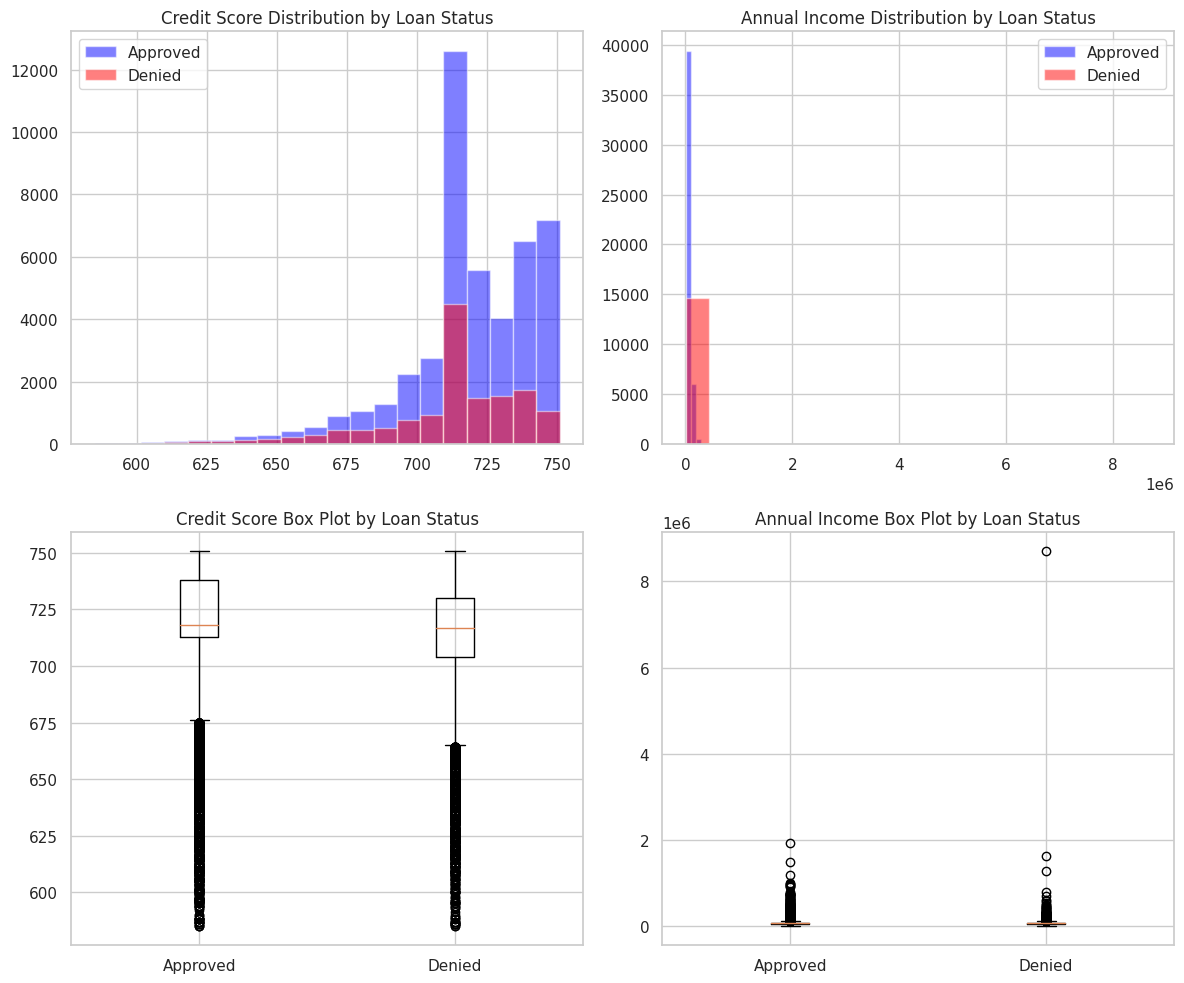

In [171]:
import matplotlib.pyplot as plt

# Create subplots for multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histograms
axes[0, 0].hist(data[data['Loan.Status'] == 1]['Credit.Score'], bins=20, alpha=0.5, label='Approved', color='blue')
axes[0, 0].hist(data[data['Loan.Status'] == 0]['Credit.Score'], bins=20, alpha=0.5, label='Denied', color='red')
axes[0, 0].set_title('Credit Score Distribution by Loan Status')
axes[0, 0].legend()

axes[0, 1].hist(data[data['Loan.Status'] == 1]['Annual.Income'], bins=20, alpha=0.5, label='Approved', color='blue')
axes[0, 1].hist(data[data['Loan.Status'] == 0]['Annual.Income'], bins=20, alpha=0.5, label='Denied', color='red')
axes[0, 1].set_title('Annual Income Distribution by Loan Status')
axes[0, 1].legend()

# Box Plots
axes[1, 0].boxplot([data[data['Loan.Status'] == 1]['Credit.Score'], data[data['Loan.Status'] == 0]['Credit.Score']], labels=['Approved', 'Denied'])
axes[1, 0].set_title('Credit Score Box Plot by Loan Status')

axes[1, 1].boxplot([data[data['Loan.Status'] == 1]['Annual.Income'], data[data['Loan.Status'] == 0]['Annual.Income']], labels=['Approved', 'Denied'])
axes[1, 1].set_title('Annual Income Box Plot by Loan Status')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()


In [166]:
scaler=StandardScaler() #Scaling the feature columns

In [167]:
X=scaler.fit_transform(data.drop('Loan.Status', axis=1))
y=data['Loan.Status']

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression()),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Classifier(RBF Kernel)', SVC(kernel='rbf',random_state=42)),
    ('Support Vector Classifier(linear Kernel)', SVC(kernel='linear',random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

best_model = None
best_accuracy = 0

# Iterate through the models and evaluate their performance
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'{model_name} Accuracy: {accuracy:.2f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print(f'Best Model: {best_model} with Accuracy: {best_accuracy:.2f}')

Random Forest Accuracy: 0.70
Logistic Regression Accuracy: 0.76
Gradient Boosting Accuracy: 0.76
Support Vector Classifier(RBF Kernel) Accuracy: 0.76
Support Vector Classifier(linear Kernel) Accuracy: 0.76
K-Nearest Neighbors Accuracy: 0.73
Best Model: Support Vector Classifier(RBF Kernel) with Accuracy: 0.76
